In [5]:
# HYPOTHESYS
# We expect that mentions of Trumps will have 50/50 positive and negative
# We expect more positive tweets volume from republican states
# We expect Trump's tweets to be majority negative
# What are the main keywords Trump uses and what are the sentiment about those subjects

In [8]:
# import dependencies 
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import time
import csv
import json
import requests
from config import api_key, api_secret_key
import re 
import twitter
from textblob import TextBlob 
import base64
import string
from collections import defaultdict
from datetime import datetime

# request limit per second (max_number_of_requests = 180 per 15 min)
# https://towardsdatascience.com/creating-the-twitter-sentiment-analysis-program-in-python-with-naive-bayes-classification-672e5589a7ed


# Reference the url for the sentiment analysis code 'https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/''

# Repository where we got Trump's tweets from 2018: https://github.com/bpb27/trump_tweet_data_archive


In [9]:
# Authenticate and Make the first API request for Twitter

client_key = api_key
client_secret = api_secret_key

key_secret = '{}:{}'.format(client_key, client_secret).encode('ascii')
b64_encoded_key = base64.b64encode(key_secret)
b64_encoded_key = b64_encoded_key.decode('ascii')

base_url = 'https://api.twitter.com/'
auth_url = '{}oauth2/token'.format(base_url)

auth_headers = {
    'Authorization': 'Basic {}'.format(b64_encoded_key),
    'Content-Type': 'application/x-www-form-urlencoded;charset=UTF-8'
}

auth_data = {
    'grant_type': 'client_credentials'
}

auth_resp = requests.post(auth_url, headers=auth_headers, data=auth_data)

auth_resp.json().keys()

access_token = auth_resp.json()['access_token']

search_headers = {
    'Authorization': 'Bearer {}'.format(access_token)    
}


In [10]:
# MENTIONS @realDonalTrump - define parameters for api call
search_params = {
    'q': '@realDonaldTrump',
    'lang': 'en',
    'count': 450
}


search_url = '{}1.1/search/tweets.json'.format(base_url)


search_resp = requests.get(search_url, headers=search_headers, params=search_params)

tweet_data = search_resp.json()

tweet_data_filter = defaultdict(list)

statuses = tweet_data['statuses']
processed_tweet_ids = set()


In [11]:
# MENTIONS @realDonalTrump - dataframe

for status in statuses:
    tweet_id = status['id_str']
    if tweet_id in processed_tweet_ids:
        continue
    
    processed_tweet_ids.add(tweet_id)

    tweet_data_filter["UserName"].append(status['user']['screen_name'])
    tweet_data_filter["text"].append(status['text'])
    tweet_data_filter["created_at"].append(status['created_at'])
    tweet_data_filter["followers_count"].append(status['user']['followers_count'])
    tweet_data_filter["retweet_count"].append(status['retweet_count'])
    tweet_data_filter["favorite_count"].append(status['favorite_count'])
    tweet_data_filter["TweetID"].append(tweet_id)
    tweet_data_filter["Retweeted"].append(status['retweeted'])
    tweet_data_filter["UserID"].append(status['user']['id_str'])
    tweet_data_filter["language"].append(status['user']['lang'])
    tweet_data_filter['verified'].append(status['user']['verified'])

tweet_data_filter_pdf = pd.DataFrame(tweet_data_filter)
tweet_data_filter_pdf

,UserName,text,created_at,followers_count,retweet_count,favorite_count,TweetID,Retweeted,UserID,language,verified
0,mangook2,RT @The_Trump_Train: @realDonaldTrump Obama le...,Mon Jul 01 05:02:37 +0000 2019,424,1320,0,1145558303394521088,False,1031809700218601473,ko,False
1,ricky1315,Look at what @MissUniverse had become!!! Where...,Mon Jul 01 05:02:37 +0000 2019,244,0,0,1145558302937538560,False,33451989,en,False
2,MelendezThom,Hypocrites like you @realDonaldTrump https://t...,Mon Jul 01 05:02:37 +0000 2019,110,0,0,1145558300760641536,False,949342412379312128,en,False
3,rmcamacho7,@coolcam101 @realDonaldTrump @WSJ You are just...,Mon Jul 01 05:02:36 +0000 2019,4,0,0,1145558300601311233,False,871627122564935680,en,False
4,billiemarieh,@realDonaldTrump Jesus H Christ. I thought thi...,Mon Jul 01 05:02:36 +0000 2019,1284,0,0,1145558298428502016,False,157044015,en,False
5,Blueladycat13,RT @realDonaldTrump: So many amazing things ha...,Mon Jul 01 05:02:36 +0000 2019,820,7875,0,1145558296763555841,False,802619328860475392,en,False
6,deplorable_gal,RT @realDonaldTrump: So many amazing things ha...,Mon Jul 01 05:02:36 +0000 2019,774,7875,0,1145558296595558400,False,25028720,en,False
7,TURKY2090,RT @realDonaldTrump: So many amazing things ha...,Mon Jul 01 05:02:35 +0000 2019,9,7873,0,1145558295333232641,False,1143299776290664449,en,False
8,wwredpepper,RT @haydenblack: @GeraldoRivera @realDonaldTru...,Mon Jul 01 05:02:35 +0000 2019,4104,32,0,1145558293500141569,False,156552819,en,False
9,Nfly760,RT @realDonaldTrump: “Stocks Cap Best First Ha...,Mon Jul 01 05:02:35 +0000 2019,2249,3162,0,1145558292388696064,False,312898776,en,False


In [12]:
# TRUMP TWEETS - import and read json file from 2018 tweets

filepath = os.path.join("condensed_2018.json")
with open(filepath) as jsonfile:
    trump_2018_json = json.load(jsonfile)

# print(json.dumps(trump_2018_json, sort_keys=True, indent=4)) 

trump_2018 = defaultdict(list)

In [13]:
# TRUMP TWEETS - creade a data frame with tweets and columns we want from Trump

for data in trump_2018_json:

    trump_2018["UserName"].append('realDonaldTrump')
    trump_2018["text"].append(data['text'])
    trump_2018["created_at"].append(data['created_at'])
    trump_2018["followers_count"].append('61506048')
    trump_2018["retweet_count"].append(data['retweet_count'])
    trump_2018["favorite_count"].append(data['favorite_count'])
    trump_2018["TweetID"].append(data['id_str'])
    trump_2018["Retweeted"].append('False')
    trump_2018["UserID"].append('25073877')
    trump_2018["language"].append('None')
    trump_2018['verified'].append('True')
    
trump_2018_pdf = pd.DataFrame(trump_2018)
trump_2018_pdf

,UserName,text,created_at,followers_count,retweet_count,favorite_count,TweetID,Retweeted,UserID,language,verified
0,realDonaldTrump,HAPPY NEW YEAR! https://t.co/bHoPDPQ7G6,Mon Dec 31 23:53:06 +0000 2018,61506048,33548,136012,1079888205351145472,False,25073877,None,True
1,realDonaldTrump,"....Senator Schumer, more than a year longer t...",Mon Dec 31 20:02:52 +0000 2018,61506048,17456,65069,1079830268708556800,False,25073877,None,True
2,realDonaldTrump,Heads of countries are calling wanting to know...,Mon Dec 31 20:02:52 +0000 2018,61506048,21030,76721,1079830267274108930,False,25073877,None,True
3,realDonaldTrump,It’s incredible how Democrats can all use thei...,Mon Dec 31 15:39:15 +0000 2018,61506048,29610,127485,1079763923845419009,False,25073877,None,True
4,realDonaldTrump,"I’m in the Oval Office. Democrats, come back f...",Mon Dec 31 15:37:14 +0000 2018,61506048,30957,132439,1079763419908243456,False,25073877,None,True
5,realDonaldTrump,"I’m in the Oval Office. Democrats, come back f...",Mon Dec 31 15:33:15 +0000 2018,61506048,1123,4217,1079762413589807104,False,25073877,None,True
6,realDonaldTrump,I am the only person in America who could say ...,Mon Dec 31 14:38:52 +0000 2018,61506048,25463,112735,1079748730058870789,False,25073877,None,True
7,realDonaldTrump,"I campaigned on Border Security, which you can...",Mon Dec 31 13:29:32 +0000 2018,61506048,22079,91523,1079731279032172545,False,25073877,None,True
8,realDonaldTrump,.....Except the results are FAR BETTER than I ...,Mon Dec 31 13:19:13 +0000 2018,61506048,15152,72758,1079728684427341825,False,25073877,None,True
9,realDonaldTrump,...I campaigned on getting out of Syria and ot...,Mon Dec 31 13:12:40 +0000 2018,61506048,22119,101470,1079727034673311746,False,25073877,None,True


In [14]:
# TRUMP TWEETS - get data 2019/recent 7 days using API call

trump_search_params = {
    'screen_name': 'realDonaldTrump',
    'count': 200
}


user_url = '{}1.1/statuses/user_timeline.json'.format(base_url)


search_resp2 = requests.get(user_url, headers=search_headers, params=trump_search_params)

trump_tweet_data = search_resp2.json()

trump_tweet_data_filter = defaultdict(list)

processed_trump_tweet_ids = set()

# trump_tweet_data

In [15]:
# TRUMP TWEETS - create dataframe

for tweet in trump_tweet_data:
    trump_tweet_id = tweet['id_str']
    if trump_tweet_id in processed_trump_tweet_ids:
        continue
        
    processed_trump_tweet_ids.add(trump_tweet_id)
    
    trump_tweet_data_filter["UserName"].append(tweet['user']['screen_name'])
    trump_tweet_data_filter["text"].append(tweet['text'])
    trump_tweet_data_filter["created_at"].append(tweet['created_at'])
    trump_tweet_data_filter["followers_count"].append(tweet['user']['followers_count'])
    trump_tweet_data_filter["retweet_count"].append(tweet['retweet_count'])
    trump_tweet_data_filter["favorite_count"].append(tweet['favorite_count'])
    trump_tweet_data_filter["TweetID"].append(tweet['id_str'])
    trump_tweet_data_filter["Retweeted"].append(tweet['retweeted'])
    trump_tweet_data_filter["UserID"].append(tweet['user']['id_str'])
    trump_tweet_data_filter["language"].append(tweet['user']['lang'])
    trump_tweet_data_filter['verified'].append(tweet['user']['verified'])


trump_data_filter_pdf = pd.DataFrame(trump_tweet_data_filter)

trump_data_filter_pdf

,UserName,text,created_at,followers_count,retweet_count,favorite_count,TweetID,Retweeted,UserID,language,verified
0,realDonaldTrump,“Stocks Cap Best First Half Since 1997” @WSJ O...,Mon Jul 01 03:50:10 +0000 2019,61564246,3163,14151,1145540071384375297,False,25073877,None,True
1,realDonaldTrump,So many amazing things happened over the last ...,Mon Jul 01 03:17:58 +0000 2019,61564246,7885,39667,1145531966076477440,False,25073877,None,True
2,realDonaldTrump,https://t.co/ctb5YJL1Vb,Mon Jul 01 00:47:37 +0000 2019,61564246,20201,73455,1145494128190480384,False,25073877,None,True
3,realDonaldTrump,Leaving South Korea after a wonderful meeting ...,Sun Jun 30 10:21:17 +0000 2019,61564246,39820,185207,1145276110097154048,False,25073877,None,True
4,realDonaldTrump,RT @TheBlueHouseKR: @realDonaldTrump @moonrive...,Sun Jun 30 10:21:00 +0000 2019,61564246,7255,0,1145276038919835649,False,25073877,None,True
5,realDonaldTrump,The leaders of virtually every country that I ...,Sun Jun 30 00:29:16 +0000 2019,61564246,28988,134516,1145127125512536065,False,25073877,None,True
6,realDonaldTrump,The highly respected Farm Journal has just ann...,Sun Jun 30 00:07:39 +0000 2019,61564246,21943,92500,1145121683193421826,False,25073877,None,True
7,realDonaldTrump,I am in South Korea now. President Moon and I ...,Sat Jun 29 22:35:12 +0000 2019,61564246,21865,106925,1145098417405923330,False,25073877,None,True
8,realDonaldTrump,....again with China as our relationship with ...,Sat Jun 29 22:32:40 +0000 2019,61564246,13606,76641,1145097779632627712,False,25073877,None,True
9,realDonaldTrump,....amounts of agricultural product from our g...,Sat Jun 29 22:32:39 +0000 2019,61564246,13221,72948,1145097776658812929,False,25073877,None,True


In [16]:
# TRUMP TWEETS store in excel just in case. we can get rid of this later
# trump_data_filter_pdf.to_excel("TrumpFile3.xlsx", engine='xlsxwriter', encoding='utf8')

In [17]:
# TRUMP TWEETS combine the 2 data frames with 2018 and 2019 recent trump tweets
frames =[trump_2018_pdf, trump_data_filter_pdf]
combined_trump_tweets = pd.concat(frames)
combined_trump_tweets

,UserName,text,created_at,followers_count,retweet_count,favorite_count,TweetID,Retweeted,UserID,language,verified
0,realDonaldTrump,HAPPY NEW YEAR! https://t.co/bHoPDPQ7G6,Mon Dec 31 23:53:06 +0000 2018,61506048,33548,136012,1079888205351145472,False,25073877,None,True
1,realDonaldTrump,"....Senator Schumer, more than a year longer t...",Mon Dec 31 20:02:52 +0000 2018,61506048,17456,65069,1079830268708556800,False,25073877,None,True
2,realDonaldTrump,Heads of countries are calling wanting to know...,Mon Dec 31 20:02:52 +0000 2018,61506048,21030,76721,1079830267274108930,False,25073877,None,True
3,realDonaldTrump,It’s incredible how Democrats can all use thei...,Mon Dec 31 15:39:15 +0000 2018,61506048,29610,127485,1079763923845419009,False,25073877,None,True
4,realDonaldTrump,"I’m in the Oval Office. Democrats, come back f...",Mon Dec 31 15:37:14 +0000 2018,61506048,30957,132439,1079763419908243456,False,25073877,None,True
5,realDonaldTrump,"I’m in the Oval Office. Democrats, come back f...",Mon Dec 31 15:33:15 +0000 2018,61506048,1123,4217,1079762413589807104,False,25073877,None,True
6,realDonaldTrump,I am the only person in America who could say ...,Mon Dec 31 14:38:52 +0000 2018,61506048,25463,112735,1079748730058870789,False,25073877,None,True
7,realDonaldTrump,"I campaigned on Border Security, which you can...",Mon Dec 31 13:29:32 +0000 2018,61506048,22079,91523,1079731279032172545,False,25073877,None,True
8,realDonaldTrump,.....Except the results are FAR BETTER than I ...,Mon Dec 31 13:19:13 +0000 2018,61506048,15152,72758,1079728684427341825,False,25073877,None,True
9,realDonaldTrump,...I campaigned on getting out of Syria and ot...,Mon Dec 31 13:12:40 +0000 2018,61506048,22119,101470,1079727034673311746,False,25073877,None,True


In [18]:
# MENTIONS @realDonaldTrump - sentiment analysis for Everyone's tweets that mention Trump
# Updates df to append one column with results of sentiment analyses 

# 

tweet_data_filter_pdf["TweetTone"] = ""
for index, row in tweet_data_filter_pdf.iterrows():
    tweettext = row['text']
    sent_analysis = TextBlob(tweettext)
       # set sentiment
    if sent_analysis.sentiment.polarity > 0:
        tweet_data_filter_pdf.loc[index, "TweetTone"] = "Positive"
    elif sent_analysis.sentiment.polarity == 0:
        tweet_data_filter_pdf.loc[index, "TweetTone"] = "Neutral"
    else:
        tweet_data_filter_pdf.loc[index, "TweetTone"] = "Negative"

tweet_data_filter_pdf

,UserName,text,created_at,followers_count,retweet_count,favorite_count,TweetID,Retweeted,UserID,language,verified,TweetTone
0,mangook2,RT @The_Trump_Train: @realDonaldTrump Obama le...,Mon Jul 01 05:02:37 +0000 2019,424,1320,0,1145558303394521088,False,1031809700218601473,ko,False,Neutral
1,ricky1315,Look at what @MissUniverse had become!!! Where...,Mon Jul 01 05:02:37 +0000 2019,244,0,0,1145558302937538560,False,33451989,en,False,Neutral
2,MelendezThom,Hypocrites like you @realDonaldTrump https://t...,Mon Jul 01 05:02:37 +0000 2019,110,0,0,1145558300760641536,False,949342412379312128,en,False,Neutral
3,rmcamacho7,@coolcam101 @realDonaldTrump @WSJ You are just...,Mon Jul 01 05:02:36 +0000 2019,4,0,0,1145558300601311233,False,871627122564935680,en,False,Positive
4,billiemarieh,@realDonaldTrump Jesus H Christ. I thought thi...,Mon Jul 01 05:02:36 +0000 2019,1284,0,0,1145558298428502016,False,157044015,en,False,Neutral
5,Blueladycat13,RT @realDonaldTrump: So many amazing things ha...,Mon Jul 01 05:02:36 +0000 2019,820,7875,0,1145558296763555841,False,802619328860475392,en,False,Positive
6,deplorable_gal,RT @realDonaldTrump: So many amazing things ha...,Mon Jul 01 05:02:36 +0000 2019,774,7875,0,1145558296595558400,False,25028720,en,False,Positive
7,TURKY2090,RT @realDonaldTrump: So many amazing things ha...,Mon Jul 01 05:02:35 +0000 2019,9,7873,0,1145558295333232641,False,1143299776290664449,en,False,Positive
8,wwredpepper,RT @haydenblack: @GeraldoRivera @realDonaldTru...,Mon Jul 01 05:02:35 +0000 2019,4104,32,0,1145558293500141569,False,156552819,en,False,Neutral
9,Nfly760,RT @realDonaldTrump: “Stocks Cap Best First Ha...,Mon Jul 01 05:02:35 +0000 2019,2249,3162,0,1145558292388696064,False,312898776,en,False,Positive


In [20]:
#  MENTIONS @realDonaldTrump - store data frame to excel just in case
tweet_data_filter_pdf.to_excel("TweetFile2.xlsx", engine='xlsxwriter', encoding='utf8')

In [21]:
# TRUMP TWEETS - sentiment analysis for Trump's tweets
# Updates df to append one column with results of sentiment analyses 

combined_trump_tweets["TweetTone"] = ""
for index, row in combined_trump_tweets.iterrows():
    trumptweettext = row['text']
    sent_analysis = TextBlob(trumptweettext)
       # set sentiment
    if sent_analysis.sentiment.polarity > 0:
        combined_trump_tweets.loc[index, "TweetTone"] = "Positive"
    elif sent_analysis.sentiment.polarity == 0:
        combined_trump_tweets.loc[index, "TweetTone"] = "Neutral"
    else:
        combined_trump_tweets.loc[index, "TweetTone"] = "Negative"
combined_trump_tweets  

,UserName,text,created_at,followers_count,retweet_count,favorite_count,TweetID,Retweeted,UserID,language,verified,TweetTone
0,realDonaldTrump,HAPPY NEW YEAR! https://t.co/bHoPDPQ7G6,Mon Dec 31 23:53:06 +0000 2018,61506048,33548,136012,1079888205351145472,False,25073877,None,True,Positive
1,realDonaldTrump,"....Senator Schumer, more than a year longer t...",Mon Dec 31 20:02:52 +0000 2018,61506048,17456,65069,1079830268708556800,False,25073877,None,True,Positive
2,realDonaldTrump,Heads of countries are calling wanting to know...,Mon Dec 31 20:02:52 +0000 2018,61506048,21030,76721,1079830267274108930,False,25073877,None,True,Neutral
3,realDonaldTrump,It’s incredible how Democrats can all use thei...,Mon Dec 31 15:39:15 +0000 2018,61506048,29610,127485,1079763923845419009,False,25073877,None,True,Positive
4,realDonaldTrump,"I’m in the Oval Office. Democrats, come back f...",Mon Dec 31 15:37:14 +0000 2018,61506048,30957,132439,1079763419908243456,False,25073877,None,True,Neutral
5,realDonaldTrump,"I’m in the Oval Office. Democrats, come back f...",Mon Dec 31 15:33:15 +0000 2018,61506048,1123,4217,1079762413589807104,False,25073877,None,True,Positive
6,realDonaldTrump,I am the only person in America who could say ...,Mon Dec 31 14:38:52 +0000 2018,61506048,25463,112735,1079748730058870789,False,25073877,None,True,Positive
7,realDonaldTrump,"I campaigned on Border Security, which you can...",Mon Dec 31 13:29:32 +0000 2018,61506048,22079,91523,1079731279032172545,False,25073877,None,True,Positive
8,realDonaldTrump,.....Except the results are FAR BETTER than I ...,Mon Dec 31 13:19:13 +0000 2018,61506048,15152,72758,1079728684427341825,False,25073877,None,True,Positive
9,realDonaldTrump,...I campaigned on getting out of Syria and ot...,Mon Dec 31 13:12:40 +0000 2018,61506048,22119,101470,1079727034673311746,False,25073877,None,True,Positive


In [22]:
# for index, row in combined_trump_tweets.iterrows():
#     if  row["TweetTone"]=='Positive':
#         row['Positive Count'].append(1)
# combined_trump_tweets  

combined_trump_tweets['Positive'] = ""
combined_trump_tweets['Neutral'] = ""
combined_trump_tweets['Negative'] = ""

for index, row in combined_trump_tweets.iterrows():
    
#for tone in combined_trump_tweets['TweetTone']:
    if  row["TweetTone"]=='Positive':
        combined_trump_tweets.loc[index, 'Positive']=1
    else:
        combined_trump_tweets.loc[index, 'Positive']=0
    if  row["TweetTone"]=='Negative':
        combined_trump_tweets.loc[index, 'Negative']=1
    else:
        combined_trump_tweets.loc[index, 'Negative']=0
    if  row["TweetTone"]=='Neutral':
        combined_trump_tweets.loc[index, 'Neutral']=1
    else:
        combined_trump_tweets.loc[index, 'Neutral']=0
combined_trump_tweets    

,UserName,text,created_at,followers_count,retweet_count,favorite_count,TweetID,Retweeted,UserID,language,verified,TweetTone,Positive,Neutral,Negative
0,realDonaldTrump,HAPPY NEW YEAR! https://t.co/bHoPDPQ7G6,Mon Dec 31 23:53:06 +0000 2018,61506048,33548,136012,1079888205351145472,False,25073877,None,True,Positive,1,0,0
1,realDonaldTrump,"....Senator Schumer, more than a year longer t...",Mon Dec 31 20:02:52 +0000 2018,61506048,17456,65069,1079830268708556800,False,25073877,None,True,Positive,1,0,0
2,realDonaldTrump,Heads of countries are calling wanting to know...,Mon Dec 31 20:02:52 +0000 2018,61506048,21030,76721,1079830267274108930,False,25073877,None,True,Neutral,0,1,0
3,realDonaldTrump,It’s incredible how Democrats can all use thei...,Mon Dec 31 15:39:15 +0000 2018,61506048,29610,127485,1079763923845419009,False,25073877,None,True,Positive,1,0,0
4,realDonaldTrump,"I’m in the Oval Office. Democrats, come back f...",Mon Dec 31 15:37:14 +0000 2018,61506048,30957,132439,1079763419908243456,False,25073877,None,True,Neutral,0,1,0
5,realDonaldTrump,"I’m in the Oval Office. Democrats, come back f...",Mon Dec 31 15:33:15 +0000 2018,61506048,1123,4217,1079762413589807104,False,25073877,None,True,Positive,1,0,0
6,realDonaldTrump,I am the only person in America who could say ...,Mon Dec 31 14:38:52 +0000 2018,61506048,25463,112735,1079748730058870789,False,25073877,None,True,Positive,1,0,0
7,realDonaldTrump,"I campaigned on Border Security, which you can...",Mon Dec 31 13:29:32 +0000 2018,61506048,22079,91523,1079731279032172545,False,25073877,None,True,Positive,1,0,0
8,realDonaldTrump,.....Except the results are FAR BETTER than I ...,Mon Dec 31 13:19:13 +0000 2018,61506048,15152,72758,1079728684427341825,False,25073877,None,True,Positive,1,0,0
9,realDonaldTrump,...I campaigned on getting out of Syria and ot...,Mon Dec 31 13:12:40 +0000 2018,61506048,22119,101470,1079727034673311746,False,25073877,None,True,Positive,1,0,0


In [58]:
datetime_object = datetime.strptime('Mon Dec 31 20:02:52 +0000 2019', '%a %b %d %X %z %Y')
combined_trump_tweets['created_at'] = pd.to_datetime(combined_trump_tweets.created_at)
combined_trump_tweets['date'] = combined_trump_tweets['created_at'].dt.strftime('%m/%d/%Y')
combined_trump_tweets['month'] = combined_trump_tweets['created_at'].dt.strftime('%m')
combined_trump_tweets['year'] = combined_trump_tweets['created_at'].dt.strftime('%Y')

In [63]:
# TRUMP TWEETS - store data frame to excel just in case
combined_trump_tweets.to_csv("TrumpTweetsDB.csv", encoding='utf8')

In [41]:
example_positive = combined_trump_tweets.loc[combined_trump_tweets['TweetTone']=="Positive",:]
example_positive_sorted = example_positive.sort_values(by=['retweet_count'], ascending=False)
example_positive_sorted['text'].head()

,UserName,text,created_at,followers_count,retweet_count,favorite_count,TweetID,Retweeted,UserID,language,verified,TweetTone,Positive,Neutral,Negative,date,month,year
2797,realDonaldTrump,"Thank you Kanye, very cool! https://t.co/vRIC8...",2018-04-25 19:33:07+00:00,61506048,108482,362139,989225812166696960,False,25073877,None,True,Positive,1,0,0,04/25/2018,04,2018
674,realDonaldTrump,Had a very good conversation with the newly el...,2018-10-29 12:28:08+00:00,61506048,92699,341189,1056885392522260480,False,25073877,None,True,Positive,1,0,0,10/29/2018,10,2018
43,realDonaldTrump,Merry Christmas!,2018-12-25 12:59:08+00:00,61506048,89255,508372,1077549301449060352,False,25073877,None,True,Positive,1,0,0,12/25/2018,12,2018
1025,realDonaldTrump,Judge Kavanaugh showed America exactly why I n...,2018-09-27 22:46:17+00:00,61506048,84180,320104,1045444544068812800,False,25073877,None,True,Positive,1,0,0,09/27/2018,09,2018
2693,realDonaldTrump,Five Most Wanted leaders of ISIS just captured!,2018-05-10 14:33:00+00:00,61506048,68865,301809,994586105822564353,False,25073877,None,True,Positive,1,0,0,05/10/2018,05,2018


In [43]:
negative = combined_trump_tweets.loc[combined_trump_tweets['TweetTone']=="Negative",:]
example_negative_sorted = negative.sort_values(by=['retweet_count'], ascending=False)
example_negative_sorted['text'].head()

,UserName,text,created_at,followers_count,retweet_count,favorite_count,TweetID,Retweeted,UserID,language,verified,TweetTone,Positive,Neutral,Negative,date,month,year
1901,realDonaldTrump,"To Iranian President Rouhani: NEVER, EVER THRE...",2018-07-23 03:24:19+00:00,61506048,107757,332225,1021234525626609666,False,25073877,None,True,Negative,0,0,1,07/23/2018,07,2018
27,realDonaldTrump,BORING!,2019-06-27 01:35:55+00:00,61564246,79620,327604,1144056731653169152,False,25073877,None,True,Negative,0,0,1,06/27/2019,06,2019
3060,realDonaldTrump,Crazy Joe Biden is trying to act like a tough ...,2018-03-22 10:19:57+00:00,61506048,75713,258162,976765417908776963,False,25073877,None,True,Negative,0,0,1,03/22/2018,03,2018
16,realDonaldTrump,All Democrats just raised their hands for givi...,2019-06-28 01:37:04+00:00,61564246,72324,291032,1144419410729242625,False,25073877,None,True,Negative,0,0,1,06/28/2019,06,2019
953,realDonaldTrump,"You don’t hand matches to an arsonist, and you...",2018-10-07 01:21:22+00:00,61506048,67746,228025,1048745061888880640,False,25073877,None,True,Negative,0,0,1,10/07/2018,10,2018


In [48]:
neutral = combined_trump_tweets.loc[combined_trump_tweets['TweetTone']=="Neutral",:]
example_neutral_sorted = neutral.sort_values(by=['retweet_count'], ascending=False)
example_neutral_sorted['text'].head()

2039    RT @realDonaldTrump: They just didn't get it, ...
2057    They just didn't get it, but they do now! http...
734     I agree with President Obama 100%! https://t.c...
118                               https://t.co/JDS4zUXXJG
2243    RT @realDonaldTrump: Don’t worry, the Republic...
Name: text, dtype: object

In [24]:
# adjust time format from 'created at' and appending a new column called 'date', 'month', 'year'


only2018 = combined_trump_tweets.loc[combined_trump_tweets['year']=="2018",:]

tone_group_month = only2018.groupby('month').agg(
    {
    'Positive': "sum",
    'Neutral': "sum",
    'Negative': "sum",
    'TweetID': "count"
    }
)

tone_group_month

,Positive,Neutral,Negative,TweetID
month,,,,
01,90,13,44,147
02,106,28,41,175
03,106,33,32,171
04,163,28,66,257
05,157,35,67,259
06,221,65,100,386
07,194,73,69,336
08,218,60,102,380
09,227,100,56,383


In [49]:
tone_group_month.mean()

Positive    173.416667
Neutral      55.250000
Negative     63.833333
TweetID     292.500000
dtype: float64

In [27]:
# FOLLOWER DATA FOR OTHER POLITICIANS

screename_list=['VP', 'AOC' ,'senatemajldr','SecPompeo','LindseyGrahamSC','SpeakerPelosi','BarackObama','JoeBiden','HillaryClinton','realDonaldTrump']
followers_count_analysis=pd.DataFrame(columns=['UserName','Follower_count'])
i = 0
for item in screename_list:
    user_url= '{}1.1/users/show.json?screen_name={}'.format(base_url, item)
    search_resp3=requests.get(user_url, headers=search_headers)
    followers_count = search_resp3.json()

    followers_count_analysis.loc[i]={'UserName': item, 'Follower_count': followers_count["followers_count"]}
    i += 1

followers_count_analysis

,UserName,Follower_count
0,VP,7558415
1,AOC,4573824
2,senatemajldr,903551
3,SecPompeo,685729
4,LindseyGrahamSC,925724
5,SpeakerPelosi,2640226
6,BarackObama,106831756
7,JoeBiden,3615137
8,HillaryClinton,24745854
9,realDonaldTrump,61564294


In [28]:
#create function that cleans up punctuations

def remove_punctuation(input_string):
    out_string = ''
    for char in input_string:
        if char not in string.punctuation and char != '\u2026' and char!='”' and char!='“':
#             out_string = out_string + char
#         if char !='...':
            out_string = out_string + char
    return out_string

In [29]:
# TRUMP TWEETS - frequently used words List

key_words=[]
for text in combined_trump_tweets['text']:
    key_words.append(text.split())

keylist = []
for sublist in key_words:
    for item in sublist:
        keylist.append(item)

#  cleaning up article words and others that we don't want. cleaning up punctuation and setting all to lowercasw       
keylistclean = []
unwanted = ['and', 'to', 'a', 'an', 'for', 'the', 'in', 'of', 'is', 'at', 'that', 'on', 'it', 'are', 'is', 'with']
    

for item in keylist:
    cleanitem = remove_punctuation(item).lower()
    if cleanitem not in unwanted: 
        keylistclean.append(cleanitem)
        
c = dict((word, keylistclean.count(word)) for word in keylistclean)

key_word_trend=pd.DataFrame(c.items(), columns=['key_word', 'occurance'])




In [30]:
# Sort list by top used KW

sorted_kw = key_word_trend.sort_values(by=['occurance'], ascending=False)
ranked_kw = sorted_kw.reset_index()

In [ ]:
# TRUMP TWEETS - store data frame to excel just in case
# key_word_trend.to_excel("TrumpKW-CLEAN-2018_2019.xlsx", engine='xlsxwriter', encoding='utf8')

In [66]:
import statsmodels.api as sm

X = engagement
y = polarity

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     543.7
Date:                Tue, 02 Jul 2019   Prob (F-statistic):          6.33e-112
Time:                        09:24:49   Log-Likelihood:                -1204.0
No. Observations:                3510   AIC:                             2410.
Df Residuals:                    3509   BIC:                             2416.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.219e-06   5.23e-08     23.317      0.000    1.12e-06    1.32e-06
==============================================================================
Omnibus:                      108.726   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.127
Skew:                           0.302   Prob(JB):                     1.39e-36
Kurtosis:                       3.875   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# VISUALIZATIONS

# Mentions of @reatDonaldTrump Tweets

tone_count=3


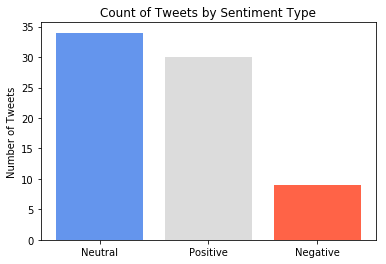

In [31]:
tone_count=tweet_data_filter_pdf['TweetTone'].value_counts()
tone_count

x_axis=np.arange(len(tone_count))

tick_location= [value for value in x_axis]
plt.xticks(tick_location, ("Neutral", "Positive", "Negative"))

plt.bar(x_axis,list(tone_count),color= ("cornflowerblue","gainsboro","tomato"),alpha=1,align="center")
print(f"tone_count={len(list(tone_count))}")
plt.ylabel("Number of Tweets")
plt.title("Count of Tweets by Sentiment Type")
plt.show()

# Mentions of @realDonalTrump: Count of Tweets by Sentiment Type

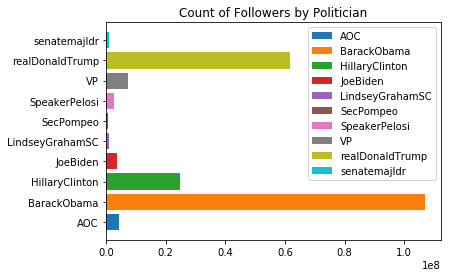

In [32]:
groups =followers_count_analysis.groupby('UserName')

for name,group in groups:
    plt.barh(name, group['Follower_count'], label=name, align='center')

plt.legend()
plt.title("Count of Followers by Politician")
plt.show()

# Trump Tweets Sentiment Analysis

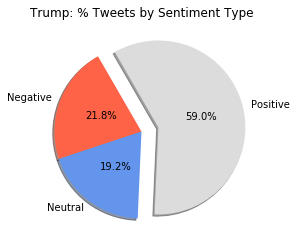

In [33]:
# Calculate Type Percents- groupby city type
tone_group = combined_trump_tweets.groupby('TweetTone').agg(
    {
    'TweetTone': "count",
    }
)

# tone_group
# Build Pie Chart

data = tone_group['TweetTone']
groups =  tone_group.index
colors = ("tomato", "cornflowerblue", "gainsboro")
explode = (0, 0, 0.2)

plt.pie(data, explode=explode, labels=groups, colors=colors, radius=1,
        autopct="%1.1f%%", shadow=True, pctdistance=0.5, startangle=120)

plt.title("Trump: % Tweets by Sentiment Type")
plt.show()
# Save Figure
plt.savefig('trump_sentiment_pie.png')


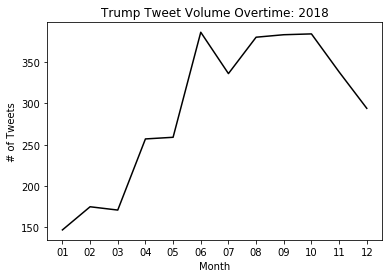

<Figure size 432x288 with 0 Axes>

In [34]:
# Count of tweets overtime

x_axis = tone_group_month.index
y_axis = tone_group_month['TweetID']

plt.title('Trump Tweet Volume Overtime: 2018')
plt.xlabel('Month')
plt.ylabel('# of Tweets')

plt.plot(x_axis, y_axis, color='black', label = 'Positive')

plt.show()
plt.savefig('trump_tweets_month.png',bbox_inches = "tight")

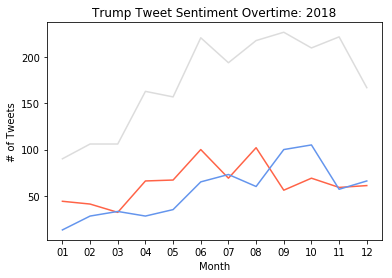

<Figure size 432x288 with 0 Axes>

In [35]:
#Sentiment Analysis overtime

positive_trump_tweets = tone_group_month["Positive"]
negative_trump_tweets = tone_group_month["Negative"]
neutral_trump_tweets = tone_group_month["Neutral"]

x_axis = tone_group_month.index

plt.title('Trump Tweet Sentiment Overtime: 2018')
plt.xlabel('Month')
plt.ylabel('# of Tweets')

plt.plot(x_axis, positive_trump_tweets, color='gainsboro', label = 'Positive')
plt.plot(x_axis, negative_trump_tweets, color='tomato', label = 'Negative')
plt.plot(x_axis, neutral_trump_tweets, color='cornflowerblue', label = 'Neutral')

plt.show()
plt.savefig('trump_sentiment_month.png',bbox_inches = "tight")

In [64]:
combined_trump_tweets['word_list'] = key_words
combined_trump_tweets['Retweet']=""
combined_trump_tweets

for index,row in combined_trump_tweets.iterrows():
    word_list=row['word_list']
    if 'RT' in word_list:
        combined_trump_tweets.loc[index, 'Retweet']= "True"
    else:
        combined_trump_tweets.loc[index, 'Retweet']= "False"
rtcount=combined_trump_tweets['Retweet'].value_counts()
rtcount

False    3174
True      536
Name: Retweet, dtype: int64

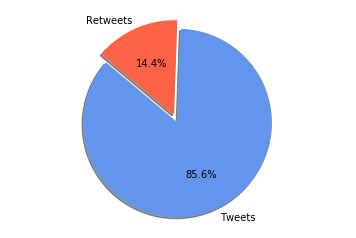

<Figure size 432x288 with 0 Axes>

In [65]:
# Labels for the sections of our pie chart
labels = ["Tweets","Retweets"]

# The values of each section of the pie chart
sizes = rtcount

# The colors of each section of the pie chart
colors = ["cornflowerblue","tomato"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
     autopct="%1.1f%%", shadow=True, startangle=140)
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
plt.show()

plt.savefig('%rt.png')

# TRUMP KEYWORD ANALYSIS

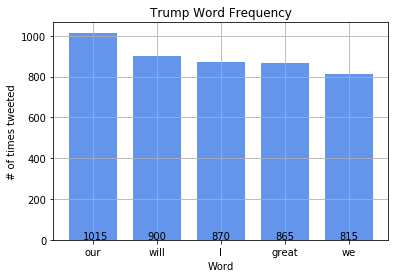

In [36]:
# creating the bar graph
x_axis = ['our', 'will', 'I', 'great', 'we']
freq = [1015, 900, 870, 865, 815]
plt.bar(x_axis, freq, color=['cornflowerblue'], width = 0.75)
plt.grid()

plt.title('Trump Word Frequency')
plt.xlabel('Word')
plt.ylabel('# of times tweeted')

# labels
i = 0
while i < 5:
    plt.text(x = -0.15 + i, y = 1, s = str(freq[i]), color='black')
    i += 1

# Save the Figure
plt.savefig('Trump Word Frequency',  bbox_inches = "tight")
plt.show()

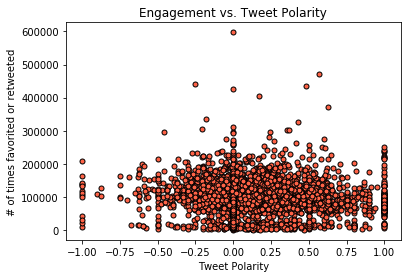

In [37]:
polarity = []
for text in trump_2018_pdf['text']:
    sent_analysis = TextBlob(text)
    score = sent_analysis.sentiment
    polarity.append(score.polarity)
    
trump_2018_pdf["polarity"] = polarity
favorites = trump_2018_pdf['favorite_count']
retweets = trump_2018_pdf['retweet_count']
engagement = favorites + retweets

x_axis = polarity
data = engagement
plt.scatter(x_axis, data, marker="o", 
            facecolors="tomato", 
            edgecolors="black", s = 25)

plt.title('Engagement vs. Tweet Polarity')
plt.xlabel('Tweet Polarity')
plt.ylabel('# of times favorited or retweeted')

plt.show
plt.savefig('Engagement vs Tweet Polarity.png', 
            bbox_inches = "tight")